 # **<span style="font-size:larger;"> 02: <span style="color:blue">Pre-Processing</span>** #

#### Imports and Read-Ins:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("../data/url_concatenated.csv")

# I. Understanding Data

In [3]:
df.head()

,url,phishing
0,https://nobell.it/70ffb52d079109dca5664cce6f31...,1
1,https://www.dghjdgf.com/paypal.co.uk/cycgi-bin...,1
2,https://serviciosbys.com/paypal.cgi.bin.get-in...,1
3,https://mail.printakid.com/www.online.american...,1
4,https://thewhiskeydregs.com/wp-content/themes/...,1


In [4]:
def initial_read(df):
    print('SHAPE')
    print(df.shape)
    print('=====')
    print('DTYPES')
    print(df.dtypes)
    print('=====')
    print('NULL VALUES')
    print(df.isnull().sum())
    print('=====')

In [5]:
initial_read(df)

SHAPE
(545895, 2)
=====
DTYPES
url         object
phishing     int64
dtype: object
=====
NULL VALUES
url         0
phishing    0
dtype: int64
=====


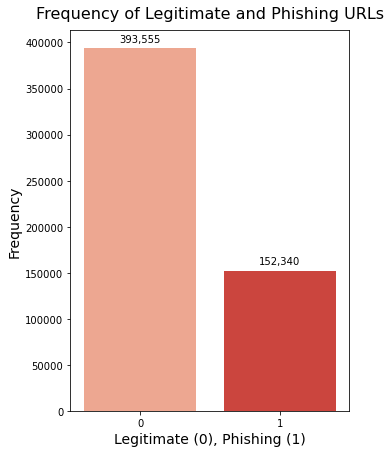

In [6]:
plt.figure(figsize = (5, 7))        
bar = sns.countplot(x=df["phishing"], 
              data=df, 
              palette="Reds")
for p in bar.patches:
    bar.annotate(format(p.get_height(), ','), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.title('Frequency of Legitimate and Phishing URLs', fontsize = 16, pad = 12)
plt.xlabel('Legitimate (0), Phishing (1)', fontsize = 14)
plt.ylabel("Frequency",fontsize = 14)
plt.show();

# II. Feature Engineering

In [7]:
import urllib
from urllib.parse import urlparse

### Creating `protocol`, `domain`, `path`, `query`, and `fragment` Columns

In [8]:
urls = [url for url in df['url']]

In [9]:
# Code adapted from https://stackoverflow.com/questions/48927719/parse-split-urls-in-a-pandas-dataframe-using-urllib

df['protocol'],df['domain'],df['path'],df['query'],df['fragment'] = zip(*[urllib.parse.urlsplit(x) for x in urls])

In [10]:
# Check
df.head()

,url,phishing,protocol,domain,path,query,fragment
0,https://nobell.it/70ffb52d079109dca5664cce6f31...,1,https,nobell.it,/70ffb52d079109dca5664cce6f317373782/login.Sky...,cmd=_profile-ach&outdated_page_tmpl=p/gen/fail...,
1,https://www.dghjdgf.com/paypal.co.uk/cycgi-bin...,1,https,www.dghjdgf.com,/paypal.co.uk/cycgi-bin/webscrcmd=_home-custom...,,
2,https://serviciosbys.com/paypal.cgi.bin.get-in...,1,https,serviciosbys.com,/paypal.cgi.bin.get-into.herf.secure.dispatch3...,,
3,https://mail.printakid.com/www.online.american...,1,https,mail.printakid.com,/www.online.americanexpress.com/index.html,,
4,https://thewhiskeydregs.com/wp-content/themes/...,1,https,thewhiskeydregs.com,/wp-content/themes/widescreen/includes/temp/pr...,84784787824HDJNDJDSJSHD//2724782784/,


### Function Creation

Function is created to extract features from each part of URL.

In [11]:
def get_features(df):
    needed_cols = ['url', 'domain', 'path', 'query', 'fragment']
    for col in needed_cols:
        df[f'{col}_length']=df[col].str.len()
        df[f'qty_dot_{col}'] = df[[col]].applymap(lambda x: str.count(x, '.'))
        df[f'qty_hyphen_{col}'] = df[[col]].applymap(lambda x: str.count(x, '-'))
        df[f'qty_slash_{col}'] = df[[col]].applymap(lambda x: str.count(x, '/'))
        df[f'qty_questionmark_{col}'] = df[[col]].applymap(lambda x: str.count(x, '?'))
        df[f'qty_equal_{col}'] = df[[col]].applymap(lambda x: str.count(x, '='))
        df[f'qty_at_{col}'] = df[[col]].applymap(lambda x: str.count(x, '@'))
        df[f'qty_and_{col}'] = df[[col]].applymap(lambda x: str.count(x, '&'))
        df[f'qty_exclamation_{col}'] = df[[col]].applymap(lambda x: str.count(x, '!'))
        df[f'qty_space_{col}'] = df[[col]].applymap(lambda x: str.count(x, ' '))
        df[f'qty_tilde_{col}'] = df[[col]].applymap(lambda x: str.count(x, '~'))
        df[f'qty_comma_{col}'] = df[[col]].applymap(lambda x: str.count(x, ','))
        df[f'qty_plus_{col}'] = df[[col]].applymap(lambda x: str.count(x, '+'))
        df[f'qty_asterisk_{col}'] = df[[col]].applymap(lambda x: str.count(x, '*'))
        df[f'qty_hashtag_{col}'] = df[[col]].applymap(lambda x: str.count(x, '#'))
        df[f'qty_dollar_{col}'] = df[[col]].applymap(lambda x: str.count(x, '$'))
        df[f'qty_percent_{col}'] = df[[col]].applymap(lambda x: str.count(x, '%'))

In [12]:
# Applying function
get_features(df)

In [13]:
# Check
df.head()

,url,phishing,protocol,domain,path,query,fragment,url_length,qty_dot_url,qty_hyphen_url,...,qty_and_fragment,qty_exclamation_fragment,qty_space_fragment,qty_tilde_fragment,qty_comma_fragment,qty_plus_fragment,qty_asterisk_fragment,qty_hashtag_fragment,qty_dollar_fragment,qty_percent_fragment
0,https://nobell.it/70ffb52d079109dca5664cce6f31...,1,https,nobell.it,/70ffb52d079109dca5664cce6f317373782/login.Sky...,cmd=_profile-ach&outdated_page_tmpl=p/gen/fail...,,233,6,4,...,0,0,0,0,0,0,0,0,0,0
1,https://www.dghjdgf.com/paypal.co.uk/cycgi-bin...,1,https,www.dghjdgf.com,/paypal.co.uk/cycgi-bin/webscrcmd=_home-custom...,,,89,5,2,...,0,0,0,0,0,0,0,0,0,0
2,https://serviciosbys.com/paypal.cgi.bin.get-in...,1,https,serviciosbys.com,/paypal.cgi.bin.get-into.herf.secure.dispatch3...,,,185,7,1,...,0,0,0,0,0,0,0,0,0,0
3,https://mail.printakid.com/www.online.american...,1,https,mail.printakid.com,/www.online.americanexpress.com/index.html,,,68,6,0,...,0,0,0,0,0,0,0,0,0,0
4,https://thewhiskeydregs.com/wp-content/themes/...,1,https,thewhiskeydregs.com,/wp-content/themes/widescreen/includes/temp/pr...,84784787824HDJNDJDSJSHD//2724782784/,,124,1,1,...,0,0,0,0,0,0,0,0,0,0


# III. EDA

In order to get a better understanding of the differences between legitimate and phishing URLs, a closer look at the distribution of each feature is examined.

### Box Plots

In [14]:
num_cols = df.select_dtypes(exclude='object')

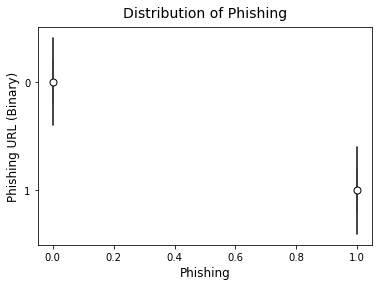

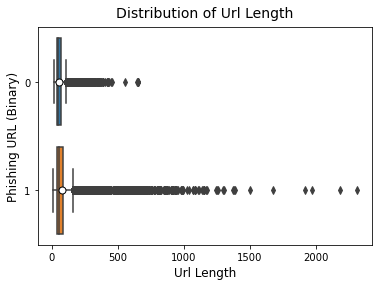

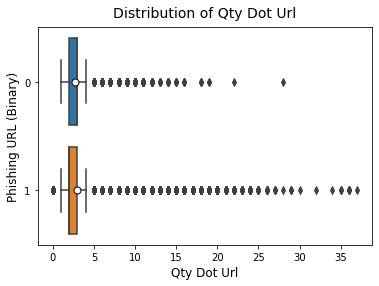

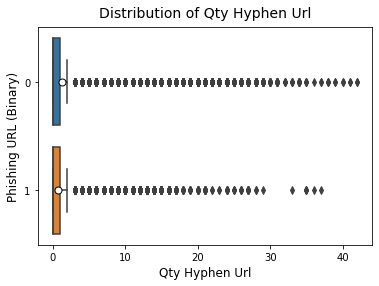

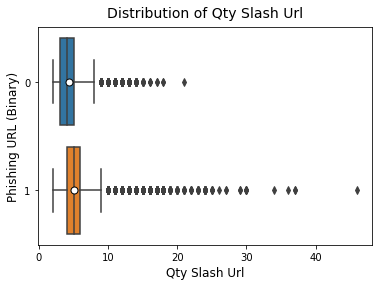

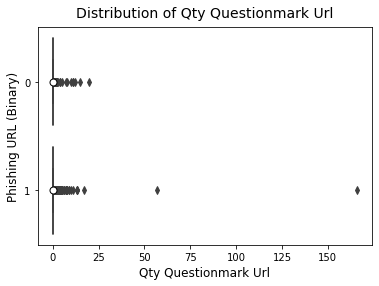

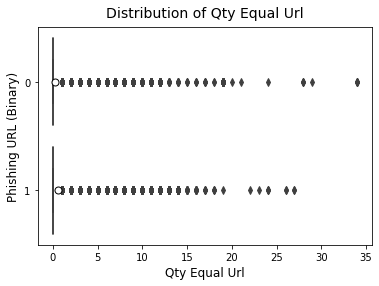

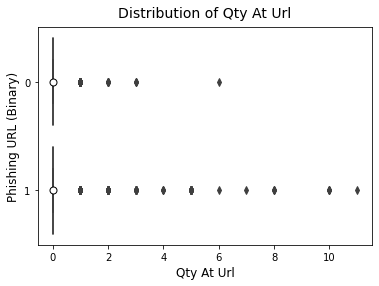

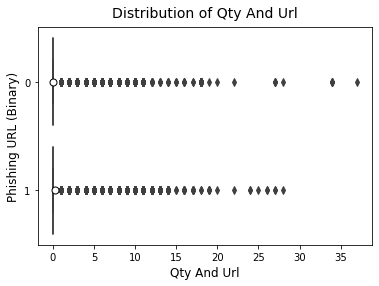

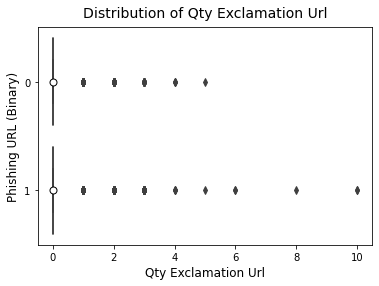

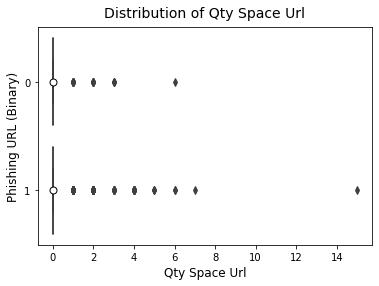

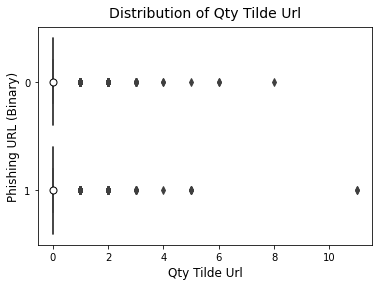

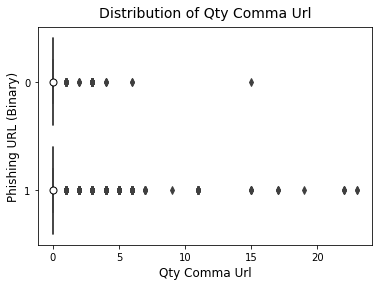

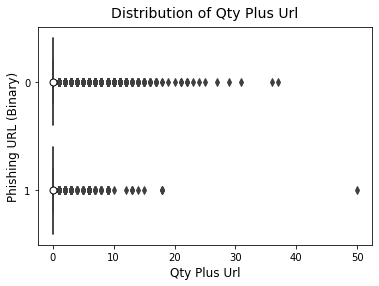

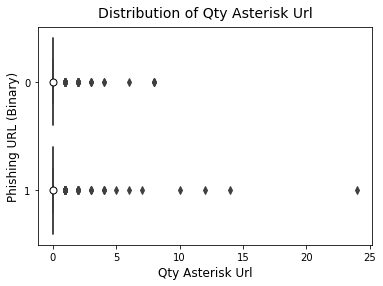

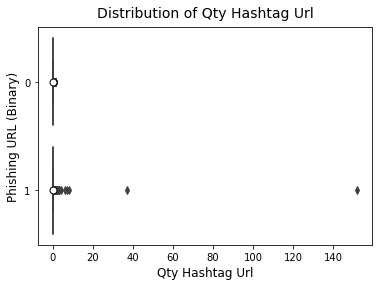

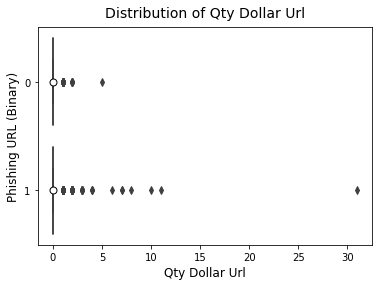

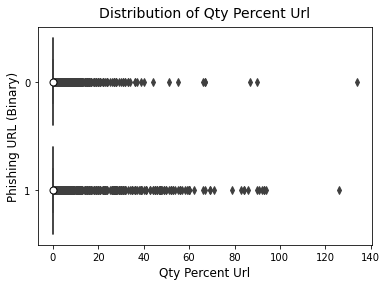

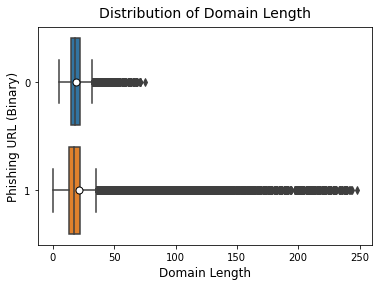

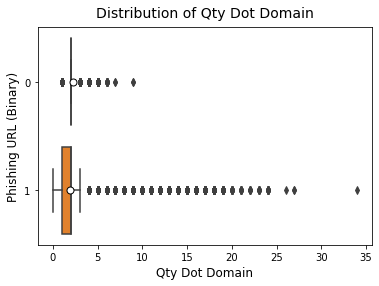

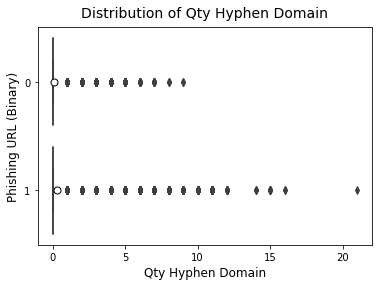

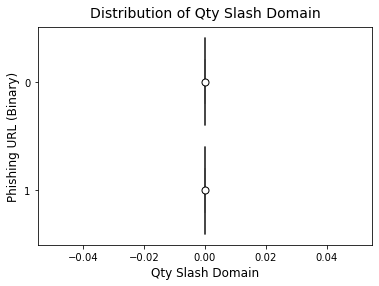

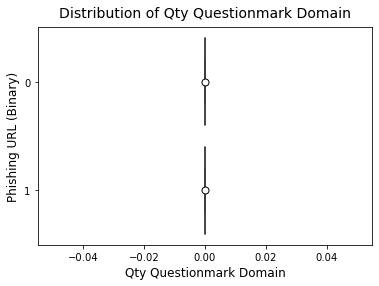

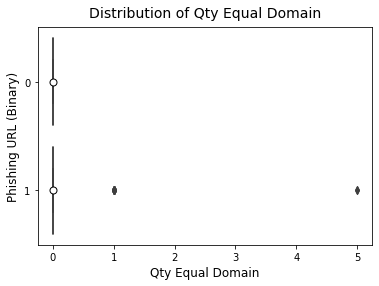

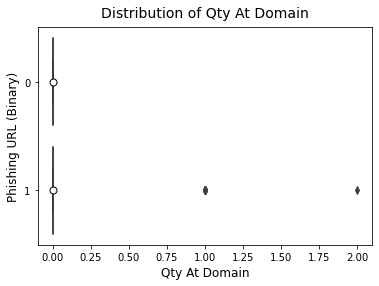

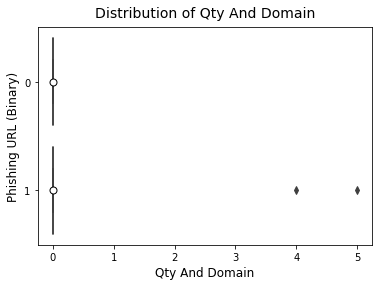

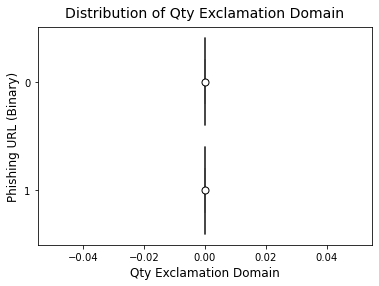

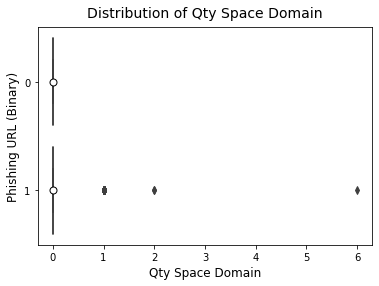

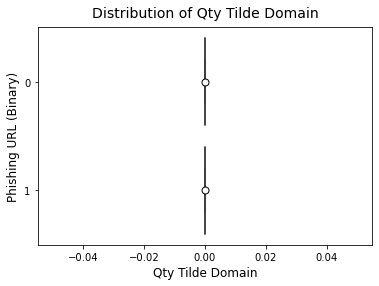

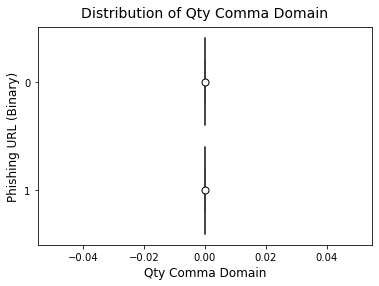

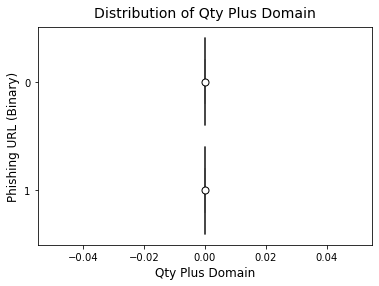

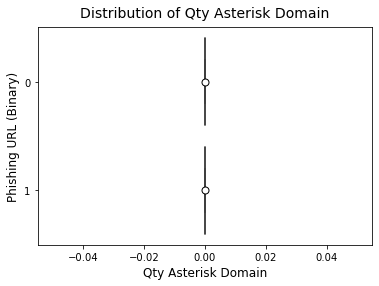

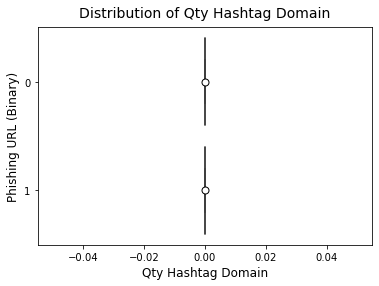

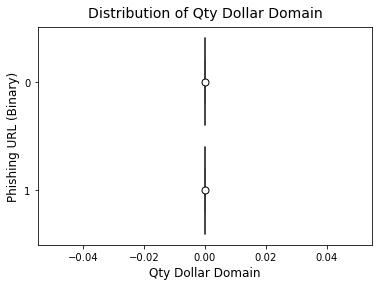

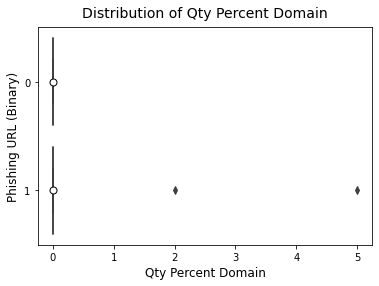

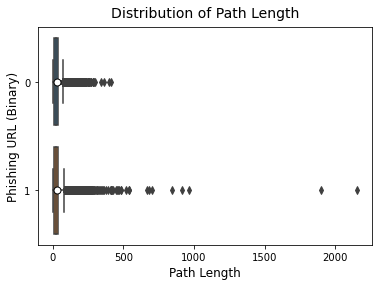

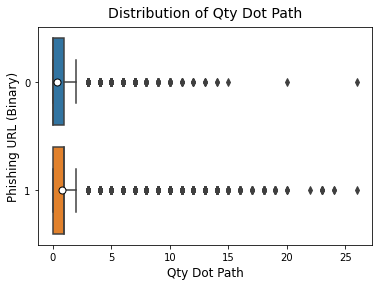

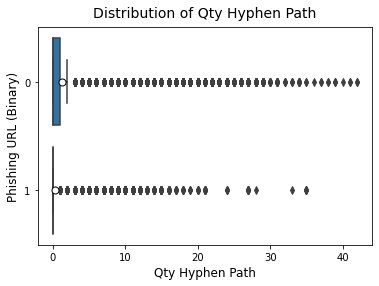

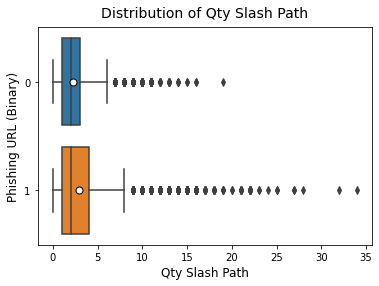

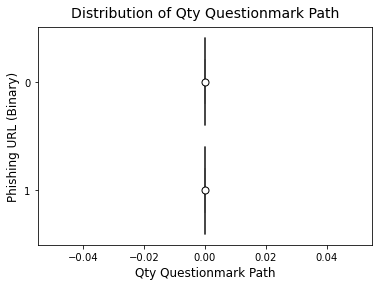

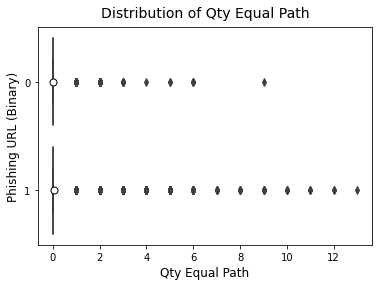

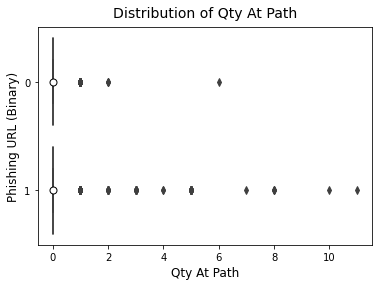

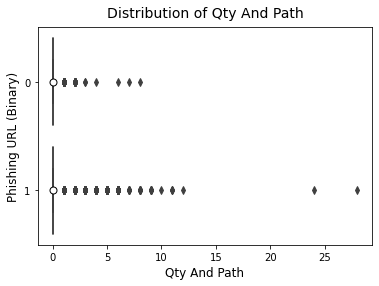

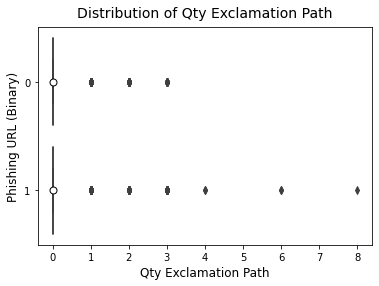

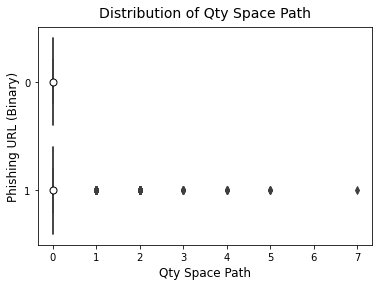

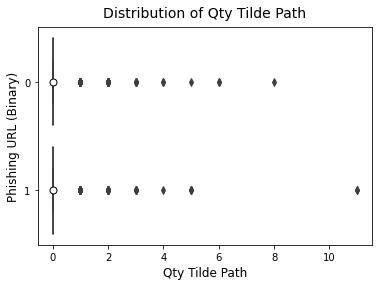

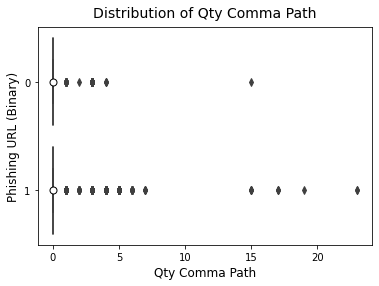

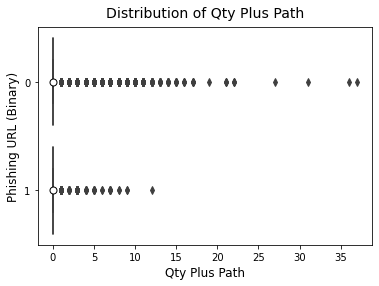

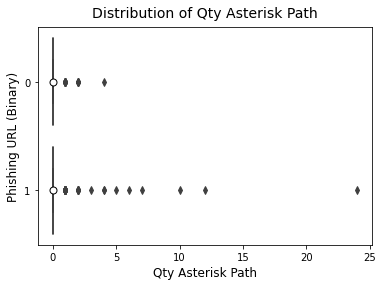

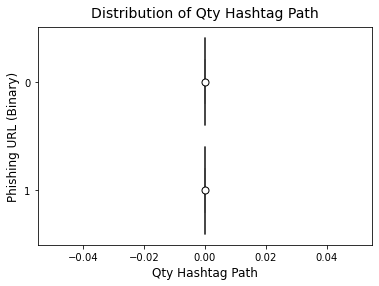

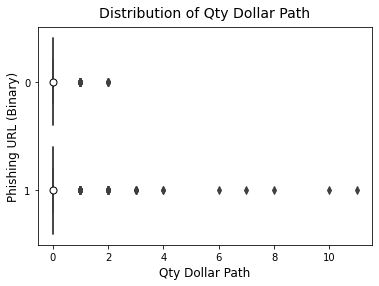

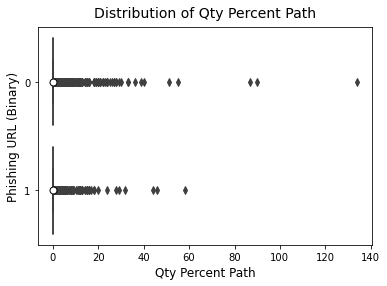

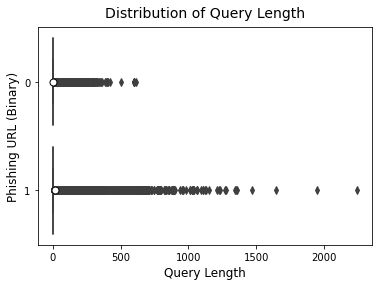

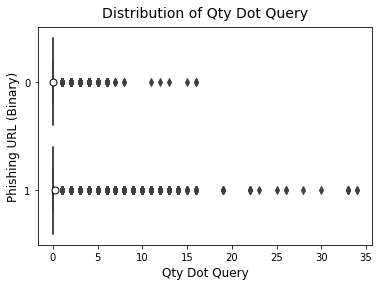

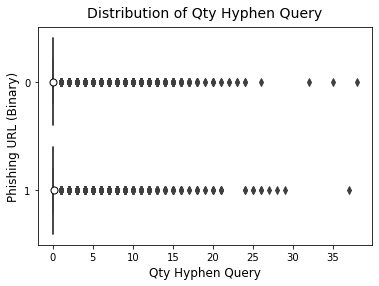

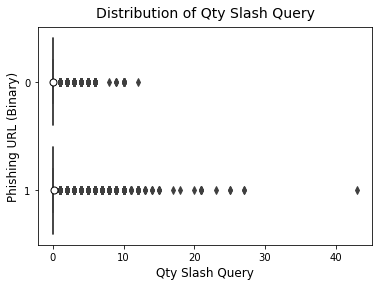

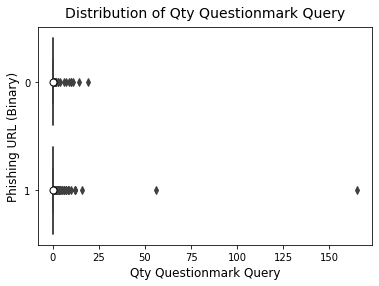

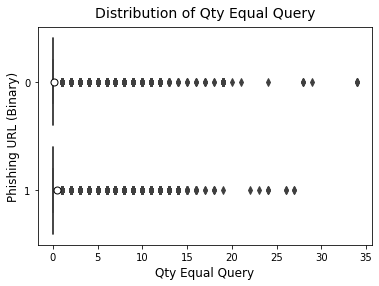

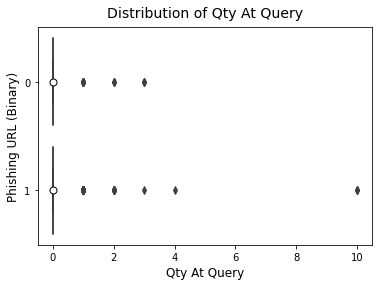

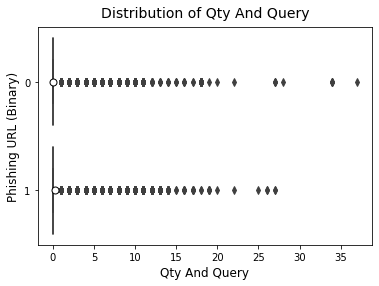

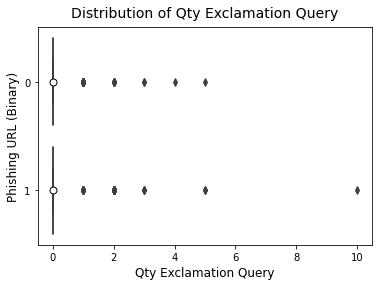

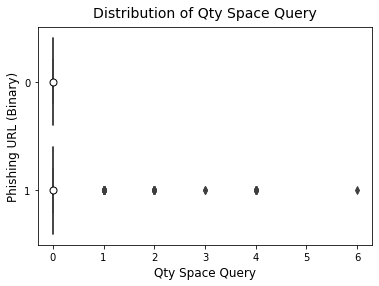

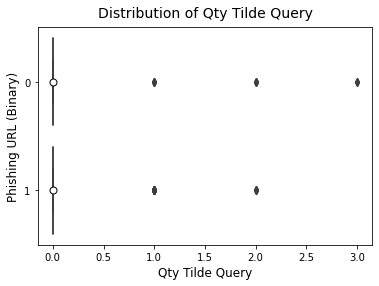

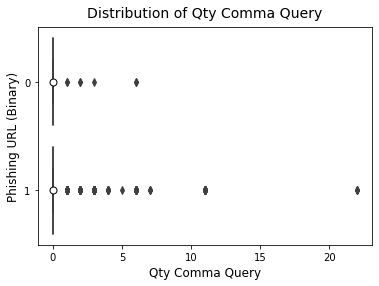

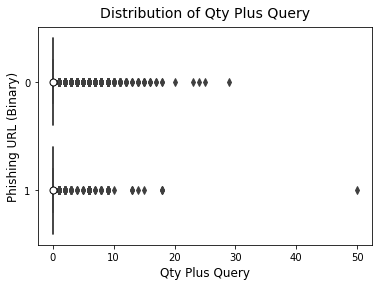

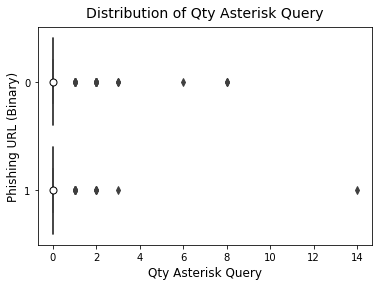

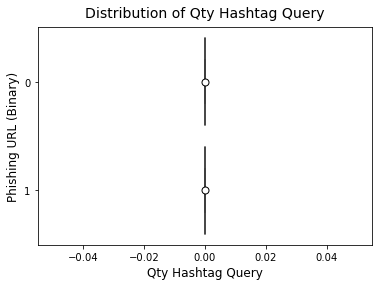

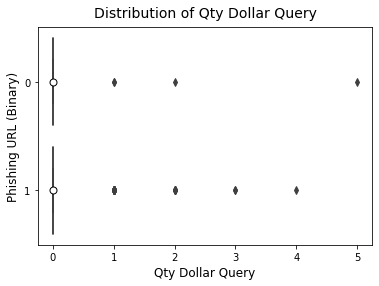

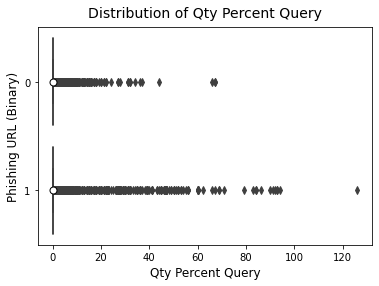

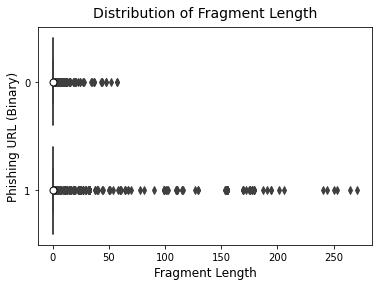

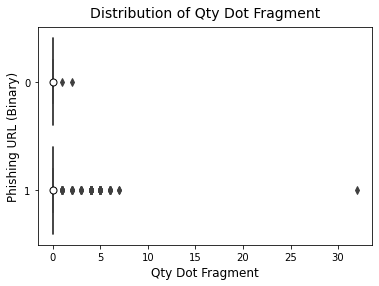

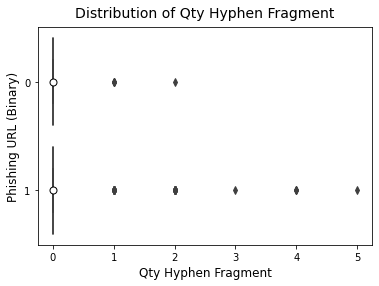

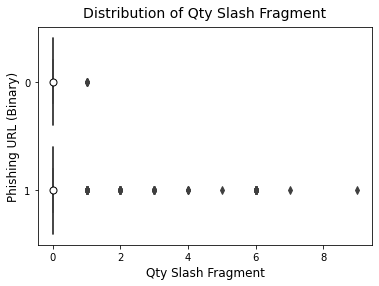

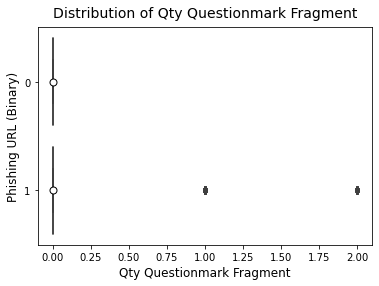

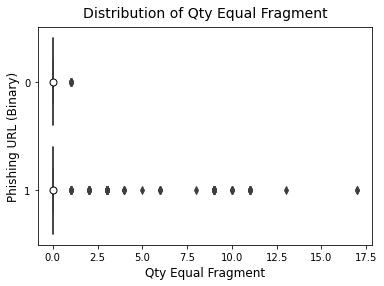

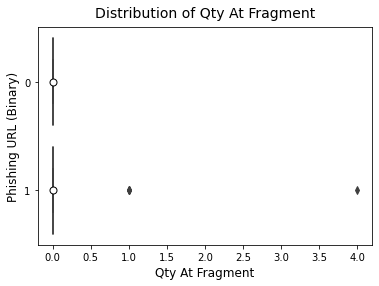

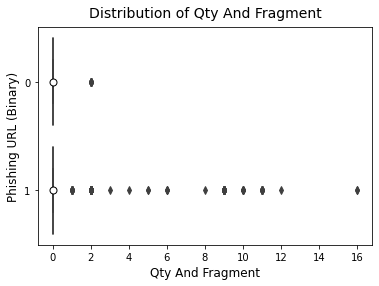

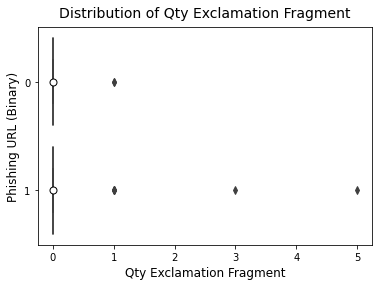

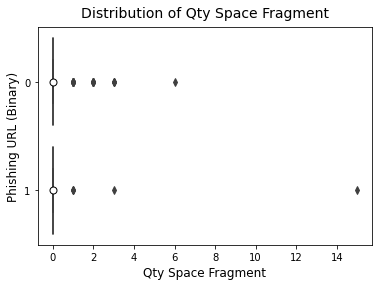

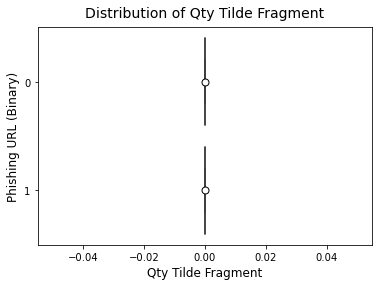

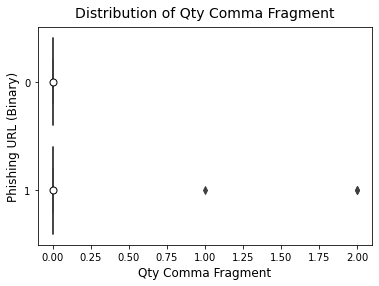

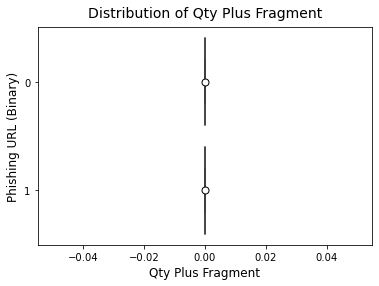

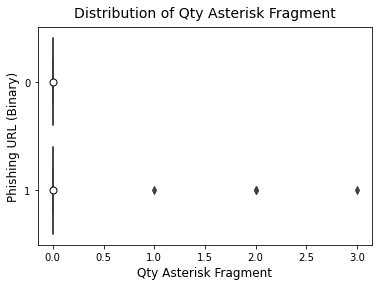

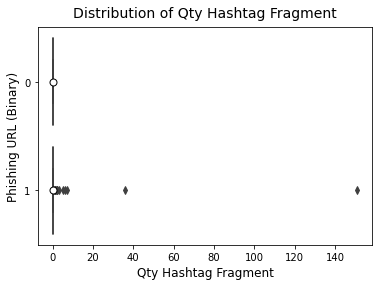

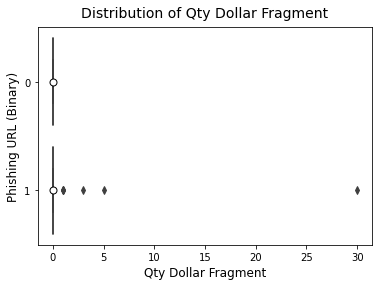

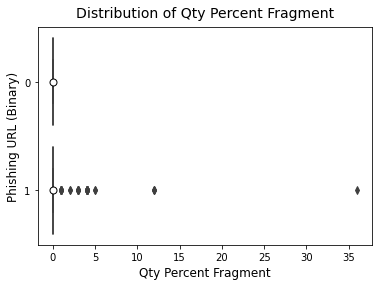

In [15]:
for col in num_cols:
    column_name = col.title().replace('_', ' ')
    title = 'Distribution of ' + column_name
    sns.boxplot(x=df[col],
                y=df['phishing'],
                data=df,
                orient='h',
                showmeans=True,
                meanprops={"marker":"o",
                           "markerfacecolor":"white", 
                           "markeredgecolor":"black",
                           "markersize":"7"})
    plt.xlabel(column_name, fontsize = 12)
    plt.ylabel('Phishing URL (Binary)', fontsize = 12)
    plt.title(title, fontsize = 14, pad = 10)
    plt.show();

### Histograms

##### **URL Length**

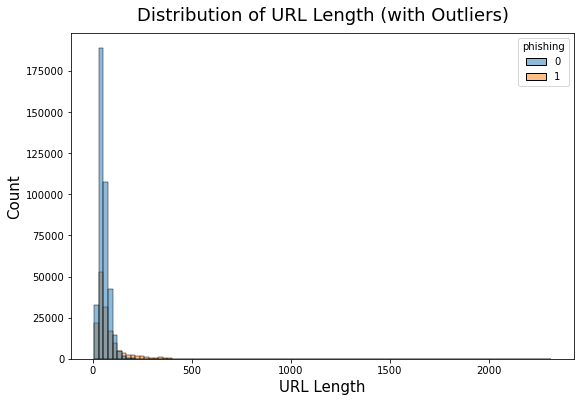

In [18]:
plt.figure(figsize=(9,6))
sns.histplot(data=df, x=df["url_length"], hue = 'phishing', bins=100)
plt.title('Distribution of URL Length (with Outliers)', fontsize = 18, pad = 12)
plt.xlabel("URL Length", fontsize = 15)
plt.ylabel("Count",fontsize = 15);
plt.show()

This histogram could provide more valuable information if outliers were not included. For visualization purposes, outliers will be removed.

In [19]:
Q1 = df['url_length'].quantile(0.25)
Q3 = df['url_length'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

filtered_url_length = df[(df['url_length']> lower_bound)]
filtered_url_length = df[(df['url_length']< upper_bound)]

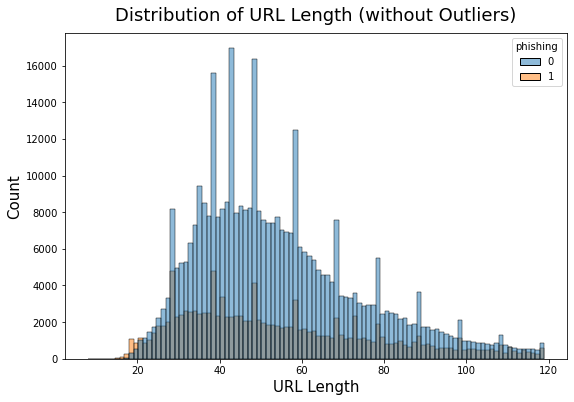

In [20]:
plt.figure(figsize=(9,6))
sns.histplot(data=filtered_url_length, x="url_length", hue = 'phishing', bins = 100)
plt.title('Distribution of URL Length (without Outliers)', fontsize = 18, pad = 12)
plt.xlabel("URL Length", fontsize = 15)
plt.ylabel("Count",fontsize = 15);
plt.show()

Surprisingly, it does not appear to be a mjor difference in URL length between phishing and legitimate URLs.

### Heatmap

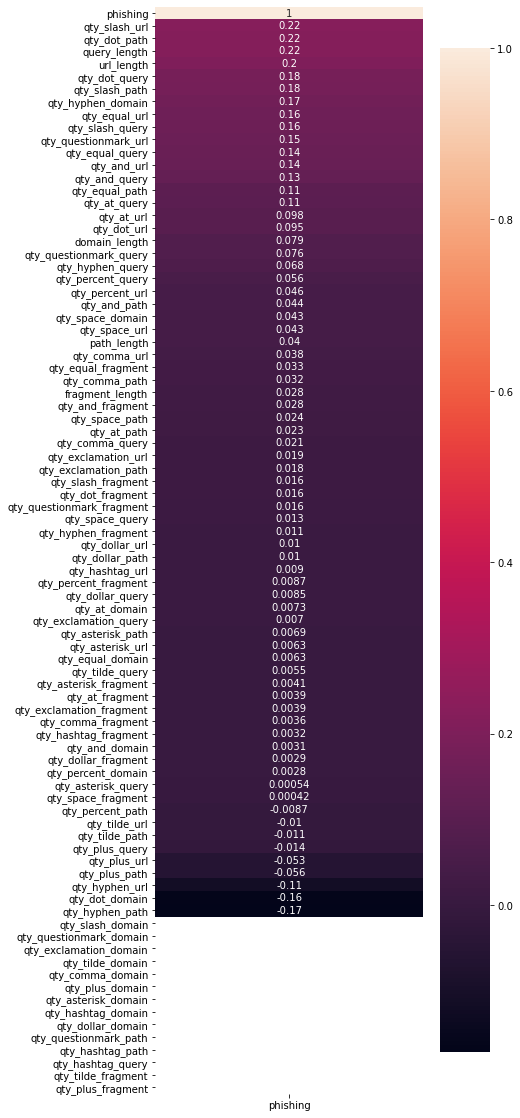

In [97]:
plt.figure(figsize=(6,20))
sns.heatmap(df.corr()[['phishing']].sort_values('phishing', ascending=False), annot=True);

The null correlations are of interest to me. I will investigate this further.

In [100]:
col_in_question = ['qty_slash_domain', 'qty_questionmark_domain','qty_equal_domain', 'qty_at_domain', 'qty_and_domain',
 'qty_exclamation_domain', 'qty_space_domain', 'qty_tilde_domain','qty_comma_domain', 'qty_plus_domain', 
 'qty_asterisk_domain','qty_hashtag_domain', 'qty_dollar_domain', 'qty_percent_domain', 'qty_questionmark_path', 
 'qty_hashtag_path', 'qty_hashtag_query', 'qty_at_fragment','qty_tilde_fragment', 'qty_plus_fragment']

In [101]:
for col in col_in_question:
    print(df[col].value_counts())

0    545895
Name: qty_slash_domain, dtype: int64
0    545895
Name: qty_questionmark_domain, dtype: int64
0    545880
1        13
5         2
Name: qty_equal_domain, dtype: int64
0    545883
1        11
2         1
Name: qty_at_domain, dtype: int64
0    545893
4         1
5         1
Name: qty_and_domain, dtype: int64
0    545895
Name: qty_exclamation_domain, dtype: int64
0    545472
1       420
2         2
6         1
Name: qty_space_domain, dtype: int64
0    545895
Name: qty_tilde_domain, dtype: int64
0    545895
Name: qty_comma_domain, dtype: int64
0    545895
Name: qty_plus_domain, dtype: int64
0    545895
Name: qty_asterisk_domain, dtype: int64
0    545895
Name: qty_hashtag_domain, dtype: int64
0    545895
Name: qty_dollar_domain, dtype: int64
0    545893
2         1
5         1
Name: qty_percent_domain, dtype: int64
0    545895
Name: qty_questionmark_path, dtype: int64
0    545895
Name: qty_hashtag_path, dtype: int64
0    545895
Name: qty_hashtag_query, dtype: int64
0    545890
1 

These columns will be dropped prior to modeling.

In [102]:
df.drop(columns = col_in_question, inplace=True)

# IV. Saving Work

In [103]:
df.to_csv('../data/url_updated.csv', index=False)

# ***Next Notebook*** - [03: Modeling]('https://github.com/ksylvia16/Phishing-URL-Detection/blob/deaa4673e1224f68bf025a749f922b6063392fc1/code/03_Model_Selection_%26_Evaluation.ipynb')